In [17]:
from typing import List,TypedDict
from langgraph.graph import StateGraph,START,END

class AgentState(TypedDict): #state schema
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int
    

In [18]:
def add_node(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState):
    if state['operation'] == '+':
        return 'addition_operation'
    elif state ['operation'] == '-':
        return 'substraction_operation'
    
def add_node2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state: AgentState):
    if state['operation2'] == '+':
        return 'addition_operation2'
    elif state ['operation2'] == '-':
        return 'substraction_operation2'


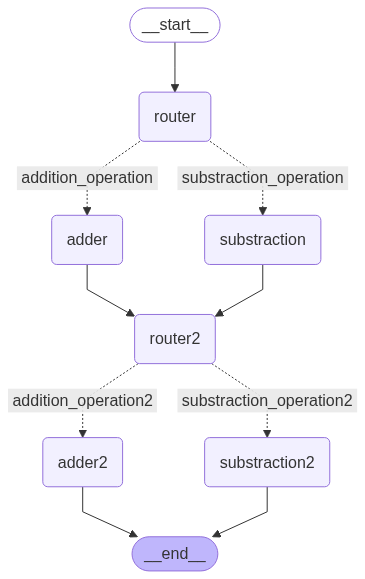

In [19]:
graph = StateGraph(AgentState)

graph.add_node('router',lambda state:state)
graph.add_node('adder',add_node)
graph.add_node('substraction',subtract_node)

graph.add_node('router2',lambda state:state)
graph.add_node('adder2',add_node2)
graph.add_node('substraction2',subtract_node2)

graph.add_edge(START,'router')

graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        'addition_operation': 'adder',
        'substraction_operation': 'substraction'
    })

graph.add_edge('adder','router2')
graph.add_edge('substraction','router2')

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
        'addition_operation2': 'adder2',
        'substraction_operation2': 'substraction2'
    })

graph.add_edge('adder2',END)
graph.add_edge('substraction2',END)

app = graph.compile()    
app


In [20]:
initial_state = AgentState(
    number1=1,
    number2=2,
    number3=3,
    number4=4,
    operation='+',
    operation2='-',
)

app.invoke(initial_state)

{'number1': 1,
 'number2': 2,
 'number3': 3,
 'number4': 4,
 'operation': '+',
 'operation2': '-',
 'finalNumber': 3,
 'finalNumber2': -1}